In [1]:
# Import analysis packages:
import pandas as pd
import numpy as np

# Import plotting packages:
from matplotlib import pyplot as plt
import seaborn as sns 

# Import NLP packages:
import re

# Import hypothesis-testing functions:
from scipy.stats import ks_2samp, chi2_contingency

In [2]:
# Import preprocessing packages:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import supervised ML classification methods:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Import supervised ML NLP methods:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Import performance-measuring methods:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [3]:
def remove_HTML(text):
    return re.sub('<.*?>', '', text)

def remove_links(text):
    return re.sub(r"http\S+", "", text)

def remove_punctuation(text):
    return re.sub(r',|\.|\:|;|-|/|&|!|\?|\(|\)|\+|@','',text)

def remove_punct(text):
    return re.sub(r',|\.|\:|;|-|&|!|\?|\(|\)|\+|@','',text)

def complex_split(text):
    return re.split(r'\s|\*', text)

def complexer_split(text):
    return re.split(r'\s|\*|/', text)

In [4]:
profiles = pd.read_csv('profiles.csv')
print(profiles.info())
#59946 rows, 31 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [5]:
profiles["drinks_num_scale"] = profiles.drinks.map({"not at all": 0, "rarely": 1, "socially": 2, "often": 3, \
                                                   "very often": 4, "desperately": 5})
profiles["drugs_num_scale"] = profiles.drugs.map({"never": 0, "sometimes": 1, "often": 2})
profiles["smokes_num_scale"] = profiles.smokes.map({"no": 0, "when drinking": 1, "sometimes": 2, "trying to quit": 3, \
                                                   "yes": 4})
profiles["sex_binary"] = profiles.sex.map({"m": 0, "f": 1})

In [6]:
print(profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               59946 non-null  int64  
 1   body_type         54650 non-null  object 
 2   diet              35551 non-null  object 
 3   drinks            56961 non-null  object 
 4   drugs             45866 non-null  object 
 5   education         53318 non-null  object 
 6   essay0            54458 non-null  object 
 7   essay1            52374 non-null  object 
 8   essay2            50308 non-null  object 
 9   essay3            48470 non-null  object 
 10  essay4            49409 non-null  object 
 11  essay5            49096 non-null  object 
 12  essay6            46175 non-null  object 
 13  essay7            47495 non-null  object 
 14  essay8            40721 non-null  object 
 15  essay9            47343 non-null  object 
 16  ethnicity         54266 non-null  object

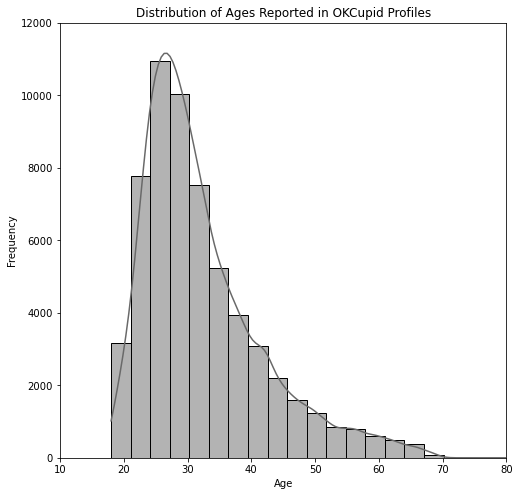

In [7]:
plt.figure(figsize=(8,8))
sns.histplot(data=profiles, x="age", bins = 30, stat = 'count', \
             kde = True, color = 'dimgray')
plt.axis([10,80,0,12000])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages Reported in OKCupid Profiles')
plt.savefig('age_distribution.png')
plt.show()
plt.close('all')

In [8]:
print(profiles.drinks.value_counts())

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64


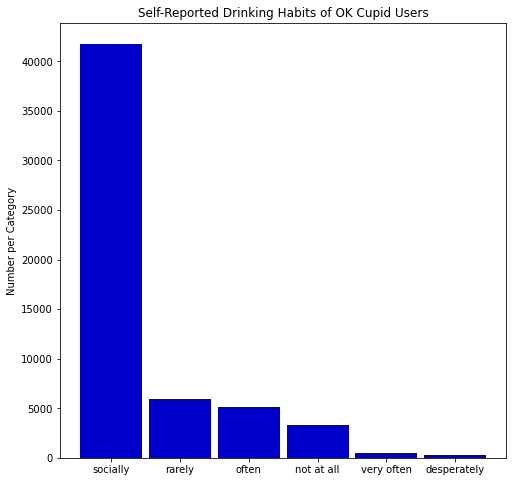

In [9]:
drinks_data = profiles.drinks
drinks_data.dropna(inplace = True)
plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.bar([1,2,3,4,5,6],drinks_data.value_counts(), width = 0.9, color = 'mediumblue')
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(["socially", "rarely", "often", "not at all", "very often", "desperately"])
plt.ylabel("Number per Category")
plt.title("Self-Reported Drinking Habits of OK Cupid Users")
plt.savefig('drinking_bar_graph.png')
plt.show()
plt.close('all')

In [10]:
print(profiles.sex.value_counts())

m    35829
f    24117
Name: sex, dtype: int64


In [11]:
print(profiles.drugs.value_counts())

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64


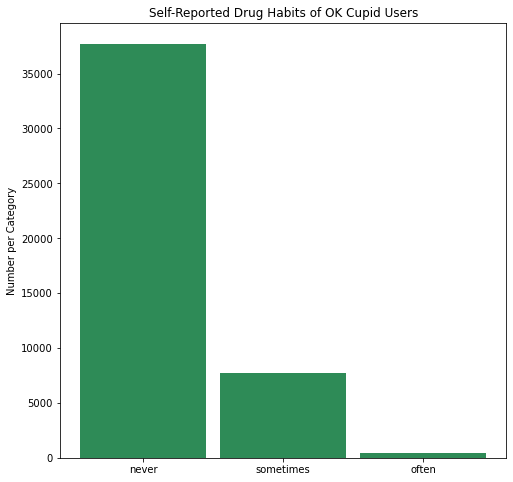

In [12]:
drugs_data = profiles.drugs
drugs_data.dropna(inplace = True)
plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.bar([1,2,3],drugs_data.value_counts(), width = 0.9, color = 'seagreen')
ax.set_xticks([1,2,3])
ax.set_xticklabels(["never", "sometimes", "often"])
plt.ylabel("Number per Category")
plt.title("Self-Reported Drug Habits of OK Cupid Users")
plt.savefig('drugs_bar_graph.png')
plt.show()
plt.close('all')

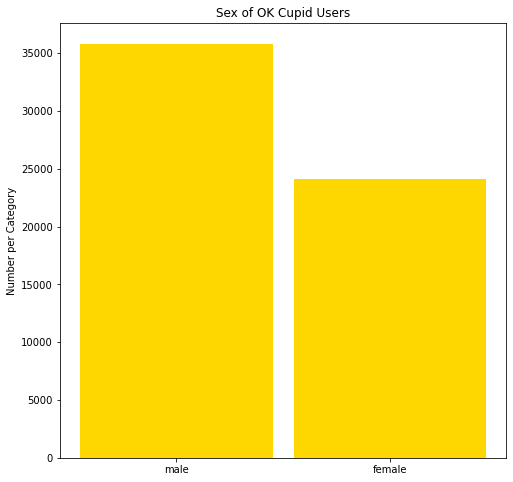

In [13]:
plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.bar([1,2],profiles.sex.value_counts(), width = 0.9, color = 'gold')
ax.set_xticks([1,2])
ax.set_xticklabels(["male", "female"])
plt.ylabel("Number per Category")
plt.title("Sex of OK Cupid Users")
plt.savefig('sex_bar_graph.png')
plt.show()
plt.close('all')

In [ ]:
########################################################################################################################

Question: Are men more likely to be drinkers than women? Are men more likely to be drug users than women?

In [14]:
male_data = profiles[profiles.sex == 'm']
female_data = profiles[profiles.sex == 'f']

print(len(male_data), len(female_data))

35829 24117


In [15]:
print(male_data.drinks.value_counts())
print(female_data.drinks.value_counts())

socially       24557
rarely          3549
often           3314
not at all      2034
very often       294
desperately      208
Name: drinks, dtype: int64
socially       17223
rarely          2408
often           1850
not at all      1233
very often       177
desperately      114
Name: drinks, dtype: int64


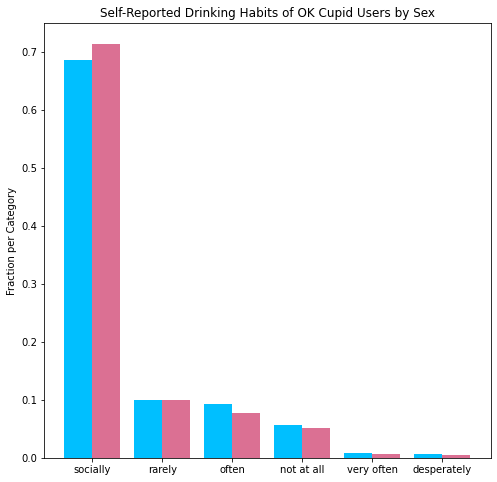

In [16]:
# The following code is borrowed for Codecademy for making four side-by-side bar plots:
# male data:
n = 1 # This is the first dataset (out of 2) 
t = 2 # Number of data sets 
d = 6 # Number of bars 
w = 0.8 # Width of each bar 
xvalues1 = [t*element + w*n for element in range(d)]
# female data:
n = 2 # This is the second dataset (out of 2) 
t = 2 # Number of data sets 
d = 6 # Number of bars 
w = 0.8 # Width of each bar 
xvalues2 = [t*element + w*n for element in range(d)]

centers = [xvalues1[i]+((xvalues2[i]-xvalues1[i])/2.0) for i in range(len(xvalues1))]

plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.bar(xvalues1,male_data.drinks.value_counts()/len(male_data), color = 'deepskyblue')
plt.bar(xvalues2,female_data.drinks.value_counts()/len(female_data), color = 'palevioletred')
ax.set_xticks(centers)
ax.set_xticklabels(["socially", "rarely", "often", "not at all", "very often", "desperately"])
plt.ylabel("Fraction per Category")
plt.title("Self-Reported Drinking Habits of OK Cupid Users by Sex")
plt.savefig('sex_split_drinking_bar_graph.png')
plt.show()
plt.close('all')

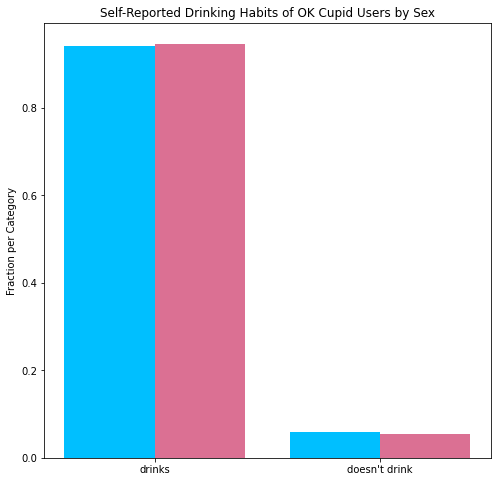

In [17]:
# The following code is borrowed for Codecademy for making four side-by-side bar plots:
# male data:
n = 1 # This is the first dataset (out of 2) 
t = 2 # Number of data sets 
d = 2 # Number of bars 
w = 0.8 # Width of each bar 
xvalues1 = [t*element + w*n for element in range(d)]
# female data:
n = 2 # This is the second dataset (out of 2) 
t = 2 # Number of data sets 
d = 2 # Number of bars 
w = 0.8 # Width of each bar 
xvalues2 = [t*element + w*n for element in range(d)]

centers = [xvalues1[i]+((xvalues2[i]-xvalues1[i])/2.0) for i in range(len(xvalues1))]

plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.bar(xvalues1, [(24557+3549+3314+294+208)/33956,2034/33956], color = 'deepskyblue')
plt.bar(xvalues2, [(17223+2408+1850+177+114)/23005,1233/23005], color = 'palevioletred')
ax.set_xticks(centers)
ax.set_xticklabels(["drinks", "doesn't drink"])
plt.ylabel("Fraction per Category")
plt.title("Self-Reported Drinking Habits of OK Cupid Users by Sex")
plt.show()
plt.close('all')

In [18]:
# create contingency table
# format: columns = drinks, doesn't drink; row 1 = male, row 2 = female

contingency_drinkorno = [[24557+3549+3314+294+208,2034],\
                         [17223+2408+1850+177+114,1233]]
chi2_drinkorno, pvalue_drinkorno, dof_drinkorno, expected_drinkorno = chi2_contingency(contingency_drinkorno)
print('drink/no drink p-value: {}'.format(pvalue_drinkorno))

drink/no drink p-value: 0.0015962554489211682


In [19]:
print(male_data.drugs.value_counts())
print(female_data.drugs.value_counts())

never        21895
sometimes     5037
often          282
Name: drugs, dtype: int64
never        15829
sometimes     2695
often          128
Name: drugs, dtype: int64


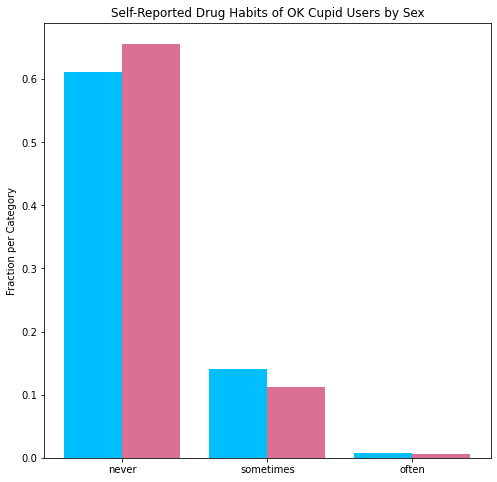

In [20]:
# The following code is borrowed for Codecademy for making four side-by-side bar plots:
# male data:
n = 1 # This is the first dataset (out of 2) 
t = 2 # Number of data sets 
d = 3 # Number of bars 
w = 0.8 # Width of each bar 
xvalues1 = [t*element + w*n for element in range(d)]
# female data:
n = 2 # This is the second dataset (out of 2) 
t = 2 # Number of data sets 
d = 3 # Number of bars 
w = 0.8 # Width of each bar 
xvalues2 = [t*element + w*n for element in range(d)]

centers = [xvalues1[i]+((xvalues2[i]-xvalues1[i])/2.0) for i in range(len(xvalues1))]

plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.bar(xvalues1,male_data.drugs.value_counts()/len(male_data), color = 'deepskyblue')
plt.bar(xvalues2,female_data.drugs.value_counts()/len(female_data), color = 'palevioletred')
ax.set_xticks(centers)
ax.set_xticklabels(["never", "sometimes", "often"])
plt.ylabel("Fraction per Category")
plt.title("Self-Reported Drug Habits of OK Cupid Users by Sex")
plt.savefig('sex_split_drinking_bar_graph.png')
plt.show()
plt.close('all')

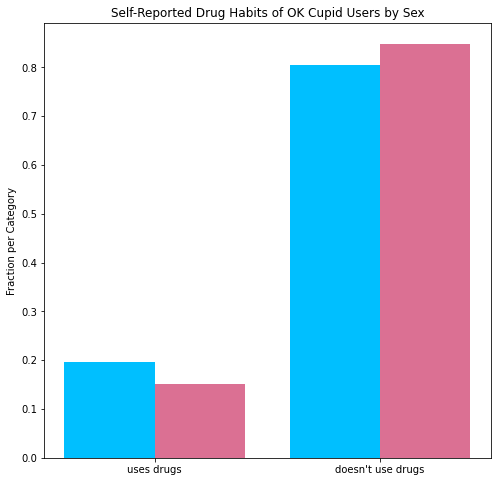

In [21]:
# The following code is borrowed for Codecademy for making four side-by-side bar plots:
# male data:
n = 1 # This is the first dataset (out of 2) 
t = 2 # Number of data sets 
d = 2 # Number of bars 
w = 0.8 # Width of each bar 
xvalues1 = [t*element + w*n for element in range(d)]
# female data:
n = 2 # This is the second dataset (out of 2) 
t = 2 # Number of data sets 
d = 2 # Number of bars 
w = 0.8 # Width of each bar 
xvalues2 = [t*element + w*n for element in range(d)]

centers = [xvalues1[i]+((xvalues2[i]-xvalues1[i])/2.0) for i in range(len(xvalues1))]

plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.bar(xvalues1, [(5037+282)/27214,21895/27214], color = 'deepskyblue')
plt.bar(xvalues2, [(2695+128)/18652,15829/18652], color = 'palevioletred')
ax.set_xticks(centers)
ax.set_xticklabels(["uses drugs", "doesn't use drugs"])
plt.ylabel("Fraction per Category")
plt.title("Self-Reported Drug Habits of OK Cupid Users by Sex")
plt.show()
plt.close('all')

In [22]:
contingency_drugsorno = [[5037+282,21895],\
                         [2695+128,15829]]
chi2_drugsorno, pvalue_drugsorno, dof_drugsorno, expected_drugsorno = chi2_contingency(contingency_drugsorno)
print('drugs/no drugs p-value: {}'.format(pvalue_drugsorno))


drugs/no drugs p-value: 7.423870936070962e-34


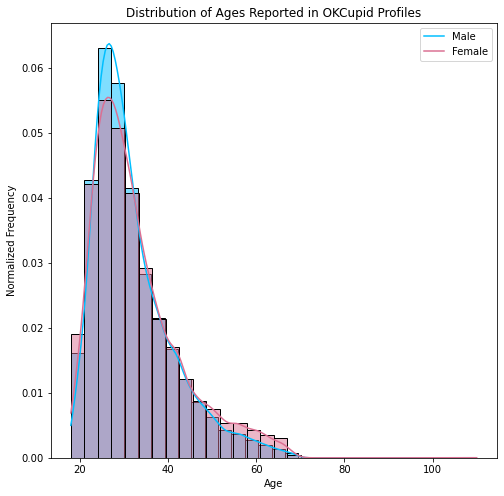

In [23]:
plt.figure(figsize=(8,8))
sns.histplot(data=male_data, x="age", bins = 30, stat = 'density', \
             kde = True, color = 'deepskyblue', alpha = 0.50)
sns.histplot(data=female_data, x="age", bins = 30, stat = 'density', \
             kde = True, color = 'palevioletred', alpha = 0.50)
plt.xlabel('Age')
plt.ylabel('Normalized Frequency')
plt.title('Distribution of Ages Reported in OKCupid Profiles')
plt.legend(['Male', 'Female'])
#plt.savefig('age_distribution.png')
plt.show()
plt.close('all')

In [24]:
ksstat_mf, kspval_mf = ks_2samp(male_data.age,female_data.age)
print('K-S test p-value for Male and Female ages test: '+ str(kspval_mf))

print('Average Male age: ' + str(np.mean(male_data.age)))
print('Median Male age: ' + str(np.median(male_data.age)))
print('Average Female age: ' + str(np.mean(female_data.age)))
print('Median Female age: ' + str(np.median(female_data.age)))

K-S test p-value for Male and Female ages test: 8.516721693170753e-16
Average Male age: 32.01858829439839
Median Male age: 30.0
Average Female age: 32.81821951320645
Median Female age: 30.0


In [ ]:
########################################################################################################################

In [7]:
# Essay_0:
# Removing the NaNs:
profiles['Temp'] = profiles.essay0.replace(np.nan, '', regex=True)

# Removing HTML links and URLs, because these are not actual words:
profiles.Temp = profiles.Temp.apply(lambda x: remove_HTML(x))
profiles.Temp = profiles.Temp.apply(lambda x: remove_links(x))

# Removing some HTML characters:
profiles.Temp = profiles.Temp.replace('\&nbsp', ' ', regex = True)
profiles.Temp = profiles.Temp.replace('\n', ' ', regex = True)

# Remove punctuation:
profiles.Temp = profiles.Temp.apply(lambda x: remove_punctuation(x))

# These essays were random strings of letters, so they are being set to an empty list:
profiles.at[31734,'Temp'] = ''
profiles.at[14392,'Temp'] = ''
profiles.at[45430,'Temp'] = ''
profiles.at[23818,'Temp'] = ''

# Make all characters lowercase, if they aren't already:
profiles.Temp = profiles.Temp.apply(lambda x: x.lower())

# Split the text by single space or asterisk:
essay0_words_list = profiles.Temp.apply(lambda x: complex_split(x))

# Add some columns to the profiles DataFrame which will ultimately contain some useful information but
# are now being initialized at zero:
profiles["essay0_length"] = 0.0
profiles["essay0_avg_word_length"]= 0.0

# Begin with a loop over all lists in the essay0_words_list as defined above. For one profile, remove the last 
# element in the list as it is a decorative (very long) string of characters. Then, loop over words/groups of 
# letters in actual list of words. Count the length of each word/group of letters as you go. Finally, find the 
# average length of a word/group of letters in the words list.

for i in range(len(essay0_words_list)):
    thislist = essay0_words_list[i]
    profiles.at[i,'essay0_length'] = len(thislist)
    if i == 17369:
        thislist[-1] = ''
    thiswordcountlist = []
    for word in thislist:
        thiswordcountlist.append(len(word))
    avgwordcount = np.mean(thiswordcountlist)
    profiles.at[i,'essay0_avg_word_length'] = avgwordcount
    
print(np.mean(profiles.essay0_avg_word_length))
print(np.mean(profiles.essay0_length))

3.9185461045635814
107.9109698728856


In [8]:
# Essay 1:
# Removing the NaNs
profiles['Temp'] = profiles.essay1.replace(np.nan, '', regex=True)

# Removing HTML links and URLs, because these are not actual words:
profiles.Temp = profiles.Temp.apply(lambda x: remove_HTML(x))
profiles.Temp = profiles.Temp.apply(lambda x: remove_links(x))

# Removing some HTML characters:
profiles.Temp = profiles.Temp.replace('\&nbsp', ' ', regex = True)
profiles.Temp = profiles.Temp.replace('\n', ' ', regex = True)

# Remove punctuation:
profiles.Temp = profiles.Temp.apply(lambda x: remove_punctuation(x))

# This essay was a random strings of letters, so it is being set to an empty list:
profiles.at[31734,'Temp'] = ''

# Make all characters lowercase, if they aren't already:
profiles.Temp = profiles.Temp.apply(lambda x: x.lower())

# Split the text by single space or asterisk:
essay1_words_list = profiles.Temp.apply(lambda x: complex_split(x))

# Add some columns to the profiles DataFrame which will ultimately contain some useful information but
# are now being initialized at zero:
profiles["essay1_length"] = 0.0
profiles["essay1_avg_word_length"]= 0.0


# Begin with a loop over all lists in the essay0_words_list as defined above. For one profile, remove the last 
# element in the list as it is a decorative (very long) string of characters. Then, loop over words/groups of 
# letters in actual list of words. For some profiles, split the single string in that list by backslash, comma, 
# or period. Count the length of each word/group of letters as you go. Count the number of times "I", "me", and
# "you" appear in the list of words/groups of letters. Finally, find the average length of a word/group of letters
# in the words list.

for i in range(len(essay1_words_list)):
    thislist = essay1_words_list[i]
    if i == 31521:
        thislist[-1] = ''
    profiles.at[i,'essay1_length'] = len(thislist)
    thiswordcountlist = []
    for word in thislist:
        thiswordcountlist.append(len(word))
    avgwordcount = np.mean(thiswordcountlist)
    profiles.at[i,'essay1_avg_word_length'] = avgwordcount

print(np.mean(profiles.essay1_avg_word_length))
print(np.mean(profiles.essay1_length))

3.970589029589384
41.074617155439896


In [9]:
# Essay 4:

# Removing the NaNs
profiles['Temp'] = profiles.essay4.replace(np.nan, '', regex=True)

# Removing HTML links and URLs, because these are not actual words:
profiles.Temp = profiles.Temp.apply(lambda x: remove_HTML(x))
profiles.Temp = profiles.Temp.apply(lambda x: remove_links(x))

# Replacing some HTML characters:
profiles.Temp = profiles.Temp.replace('\&nbsp', ' ', regex = True)
profiles.Temp = profiles.Temp.replace('\n', ' ', regex = True)

# Remove punctuation:
profiles.Temp = profiles.Temp.apply(lambda x: remove_punctuation(x))

# This essay was a random strings of letters, so it is being set to an empty list:
profiles.at[31734,'Temp'] = ''

# Make all characters lowercase, if they aren't already:
profiles.Temp = profiles.Temp.apply(lambda x: x.lower())

# Split the text by single space or asterisk:
essay4_words_list = profiles.Temp.apply(lambda x: complex_split(x))

# Add some columns to the profiles DataFrame which will ultimately contain some useful information but
# are now being initialized at zero:
profiles["essay4_length"] = 0.0
profiles["essay4_avg_word_length"]= 0.0


# Begin with a loop over all lists in the essay0_words_list as defined above. For one profile, remove the last 
# element in the list as it is a decorative (very long) string of characters. Then, loop over words/groups of 
# letters in actual list of words. For some profiles, split the single string in that list by backslash, comma, 
# or period. Count the length of each word/group of letters as you go. Count the number of times "I", "me", and
# "you" appear in the list of words/groups of letters. Finally, find the average length of a word/group of letters
# in the words list.

for i in range(len(essay4_words_list)):
    thislist = essay4_words_list[i]
    profiles.at[i,'essay4_length'] = len(thislist)
    thiswordcountlist = []
    for word in thislist:
        thiswordcountlist.append(len(word))
    avgwordcount = np.mean(thiswordcountlist)
    profiles.at[i,'essay4_avg_word_length'] = avgwordcount

print(np.mean(profiles.essay4_avg_word_length))
print(np.mean(profiles.essay4_length))

3.906492556583228
83.66651653154506


In [10]:
# Essay 5:

# Removing the NaNs
profiles['Temp'] = profiles.essay5.replace(np.nan, '', regex=True)

# Removing HTML links and URLs, because these are not actual words:
profiles.Temp = profiles.Temp.apply(lambda x: remove_HTML(x))
profiles.Temp = profiles.Temp.apply(lambda x: remove_links(x))

# Replacing some HTML characters:
profiles.Temp = profiles.Temp.replace('\&nbsp', ' ', regex = True)
profiles.Temp = profiles.Temp.replace('\&lt;', ' ', regex = True)
profiles.Temp = profiles.Temp.replace('\&gt;', ' ', regex = True)
profiles.Temp = profiles.Temp.replace('\n', ' ', regex = True)

# Remove punctuation:
profiles.Temp = profiles.Temp.apply(lambda x: remove_punctuation(x))

# Make all characters lowercase, if they aren't already:
profiles.Temp = profiles.Temp.apply(lambda x: x.lower())

# Split the text by single space or asterisk:
essay5_words_list = profiles.Temp.apply(lambda x: complex_split(x))

# The below essay was nothing but "mycomputer" repeated over and over again, without spaces inbetween, until the 
# user ran out of characters. So, I am keeping the main idea behind their essay.
profiles.at[23872,'Temp'] = 'mycomputer'

profiles.Temp = profiles.Temp.apply(lambda x: x.lower())

# Split the text by single space or asterisk:
essay5_words_list = profiles.Temp.apply(lambda x: complex_split(x))

# Add some columns to the profiles DataFrame which will ultimately contain some useful information but
# are now being initialized at zero:
profiles["essay5_length"] = 0.0
profiles["essay5_avg_word_length"]= 0.0

for i in range(len(essay5_words_list)):
    thislist = essay5_words_list[i]
    profiles.at[i,'essay5_length'] = len(thislist)
    thiswordcountlist = []
    if i == 7692:
        thislist[-1] = ''
    for word in thislist:
        thiswordcountlist.append(len(word))
    avgwordcount = np.mean(thiswordcountlist)
    profiles.at[i,'essay5_avg_word_length'] = avgwordcount

print(np.mean(profiles.essay5_avg_word_length))
print(np.mean(profiles.essay5_length))

4.063287406674716
17.724852367130417


In [11]:
# Essay 6:

# Removing the NaNs
profiles['Temp'] = profiles.essay6.replace(np.nan, '', regex=True)

# Removing HTML links and URLs, because these are not actual words:
profiles.Temp = profiles.Temp.apply(lambda x: remove_HTML(x))
profiles.Temp = profiles.Temp.apply(lambda x: remove_links(x))

# Replacing some HTML characters:
profiles.Temp = profiles.Temp.replace('\&nbsp', ' ', regex = True)
profiles.Temp = profiles.Temp.replace('\n', ' ', regex = True)

# Remove punctuation:
profiles.Temp = profiles.Temp.apply(lambda x: remove_punct(x))

# Make all characters lowercase, if they aren't already:
profiles.Temp = profiles.Temp.apply(lambda x: x.lower())

# Split the text by single space or asterisk:
essay6_words_list = profiles.Temp.apply(lambda x: complexer_split(x))

# Add some columns to the profiles DataFrame which will ultimately contain some useful information but
# are now being initialized at zero:
profiles["essay6_length"] = 0.0
profiles["essay6_avg_word_length"]= 0.0

for i in range(len(essay6_words_list)):
    thislist = essay6_words_list[i]
    profiles.at[i,'essay6_length'] = len(thislist)
    thiswordcountlist = []
    for word in thislist:
        if i == 36804:
            real_words = word.split('=')
            essay6_words_list[i] = real_words
            for wd in real_words:
                thiswordcountlist.append(len(wd))
        else:
            thiswordcountlist.append(len(word))
    avgwordcount = np.mean(thiswordcountlist)
    profiles.at[i,'essay6_avg_word_length'] = avgwordcount

print(np.mean(profiles.essay6_avg_word_length))
print(np.mean(profiles.essay6_length))

3.458410809064195
20.515964367931137


In [12]:
# Essay 7:

# Removing the NaNs
profiles['Temp'] = profiles.essay7.replace(np.nan, '', regex=True)

# Removing HTML links and URLs, because these are not actual words:
profiles.Temp = profiles.Temp.apply(lambda x: remove_HTML(x))
profiles.Temp = profiles.Temp.apply(lambda x: remove_links(x))

# Replacing some HTML characters:
profiles.Temp = profiles.Temp.replace('\&nbsp', ' ', regex = True)
profiles.Temp = profiles.Temp.replace('\n', ' ', regex = True)

# Remove punctuation:
profiles.Temp = profiles.Temp.apply(lambda x: remove_punct(x))

# Make all characters lowercase, if they aren't already:
profiles.Temp = profiles.Temp.apply(lambda x: x.lower())

# Split the text by single space or asterisk:
essay7_words_list = profiles.Temp.apply(lambda x: complexer_split(x))

# Add some columns to the profiles DataFrame which will ultimately contain some useful information but
# are now being initialized at zero:
profiles["essay7_length"] = 0.0
profiles["essay7_avg_word_length"]= 0.0

for i in range(len(essay7_words_list)):
    thislist = essay7_words_list[i]
    if i == 48833:
        thislist[1] = ''
    profiles.at[i,'essay7_length'] = len(thislist)
    thiswordcountlist = []
    for word in thislist:
        thiswordcountlist.append(len(word))
    avgwordcount = np.mean(thiswordcountlist)
    profiles.at[i,'essay7_avg_word_length'] = avgwordcount

print(np.mean(profiles.essay7_avg_word_length))
print(np.mean(profiles.essay7_length))

3.578389041185304
17.094017949487874


In [ ]:
########################################################################################################################

In [13]:
profiles.drop(columns = ['Temp'], inplace = True)

In [14]:
print(profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     59946 non-null  int64  
 1   body_type               54650 non-null  object 
 2   diet                    35551 non-null  object 
 3   drinks                  56961 non-null  object 
 4   drugs                   45866 non-null  object 
 5   education               53318 non-null  object 
 6   essay0                  54458 non-null  object 
 7   essay1                  52374 non-null  object 
 8   essay2                  50308 non-null  object 
 9   essay3                  48470 non-null  object 
 10  essay4                  49409 non-null  object 
 11  essay5                  49096 non-null  object 
 12  essay6                  46175 non-null  object 
 13  essay7                  47495 non-null  object 
 14  essay8                  40721 non-null

In [15]:
alldata = profiles[['age','sex','sex_binary','orientation','status','offspring', 
                    'drinks_num_scale','drugs_num_scale','smokes_num_scale', \
                    'education','income','job', \
                    'essay0_length', 'essay0_avg_word_length', 
                    'essay1_length', 'essay1_avg_word_length',
                    'essay4_length', 'essay4_avg_word_length',
                    'essay5_length', 'essay5_avg_word_length',
                    'essay6_length', 'essay6_avg_word_length',
                    'essay7_length', 'essay7_avg_word_length']]

In [ ]:
########################################################################################################################

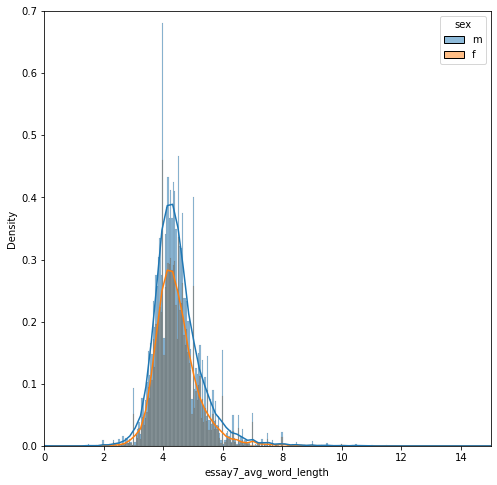

In [32]:
#essay0_plotting_data = alldata[alldata.essay0_length > 1.0]
#essay1_plotting_data = alldata[alldata.essay1_length > 1.0]
#essay4_plotting_data = alldata[alldata.essay4_length > 1.0]
#essay5_plotting_data = alldata[alldata.essay5_length > 1.0]
#essay6_plotting_data = alldata[alldata.essay6_length > 1.0]
#essay7_plotting_data = alldata[alldata.essay7_length > 1.0]

plt.figure(figsize=(8,8))
#sns.histplot(data=essay0_plotting_data, x="essay0_length", hue='sex', stat = 'density', \
#              common_norm = True, kde = True)
#plt.axis([0,1000,0,0.006])
#sns.histplot(data=essay0_plotting_data, x="essay0_avg_word_length", hue='sex', stat = 'density', \
#             common_norm = True, kde = True)
#plt.axis([0,12,0,0.7])
#sns.histplot(data=essay1_plotting_data, x="essay1_length", hue='sex', bins = 100, stat = 'density', \
#              common_norm = True, kde = True)
#plt.axis([0,400,0,0.016])
#sns.histplot(data=essay1_plotting_data, x="essay1_avg_word_length", hue='sex', stat = 'density', \
#             common_norm = True, kde = True)
#plt.axis([0,12,0,0.7])
#sns.histplot(data=essay4_plotting_data, x="essay4_length", hue='sex', stat = 'density', \
#             common_norm = True, kde = True)
#plt.axis([0,1000,0,0.005])
#sns.histplot(data=essay4_plotting_data, x="essay4_avg_word_length", hue='sex', stat = 'density', \
#             common_norm = True, kde = True)
#plt.axis([0,15,0,0.5])
#sns.histplot(data=essay5_plotting_data, x="essay5_length", hue='sex', stat = 'density', \
#             common_norm = True, kde = True)
#plt.axis([0,200,0,0.06])
#sns.histplot(data=essay5_plotting_data, x="essay5_avg_word_length", hue='sex', stat = 'density', \
#             common_norm = True, kde = True)
#plt.axis([0,15,0,0.5])
#sns.histplot(data=essay6_plotting_data, x="essay6_length", hue='sex', stat = 'density', \
#             common_norm = True, kde = True)
#plt.axis([0,250,0,0.035])
#sns.histplot(data=essay6_plotting_data, x="essay6_avg_word_length", hue='sex', stat = 'density', \
#             common_norm = True, kde = True)
#plt.axis([0,15,0,0.7])
#sns.histplot(data=essay7_plotting_data, x="essay7_length", hue='sex', stat = 'density', \
#             common_norm = True, kde = True)
#plt.axis([0,150,0,0.035])
sns.histplot(data=essay7_plotting_data, x="essay7_avg_word_length", hue='sex', stat = 'density', \
             common_norm = True, kde = True)
plt.axis([0,15,0,0.7])
plt.show()
plt.close('all')

In [ ]:
########################################################################################################################

In [34]:
nb_data = profiles.dropna(subset = ['essay0'])

master_essay_list = nb_data.essay0.tolist()
master_sexes_list = nb_data.sex.tolist()
print(len(master_essay_list), len(master_sexes_list))

54458 54458


In [35]:
nb1_train_data, nb1_test_data, nb1_train_labels, nb1_test_labels = \
train_test_split(master_essay_list, master_sexes_list,train_size = 0.8, test_size = 0.2, random_state = 21)

counter1 = CountVectorizer()
counter1.fit(nb1_train_data)
nb1_train_counts = counter1.transform(nb1_train_data)
nb1_test_counts = counter1.transform(nb1_test_data)

nb1_classifier = MultinomialNB()
nb1_classifier.fit(nb1_train_counts, nb1_train_labels)
nb1_predictions = nb1_classifier.predict(nb1_test_counts)

In [36]:
print(accuracy_score(nb1_test_labels, nb1_predictions))
print(confusion_matrix(nb1_test_labels, nb1_predictions))
# confusion matrix format:
# f for female is top row
# m for male is bottom row
# 2749 is predict f actual f; 1625 is predict m actual f
# 1595 is predict f actual m; 4923 is predict m actual m

0.7043701799485861
[[2749 1625]
 [1595 4923]]


In [37]:
# The below gets everything that user0 said and stuffs it into element 0 of the master_essay_list array, etc.

nb_data = profiles.dropna(subset = ['essay0','essay1', 'essay3', 'essay5'])
master_essay_list = (nb_data.essay0 + nb_data.essay1 + nb_data.essay3 + nb_data.essay5).tolist()
master_sexes_list = nb_data.sex.tolist()

print(len(master_essay_list), len(master_sexes_list))

41548 41548


In [38]:
nb1_train_data, nb1_test_data, nb1_train_labels, nb1_test_labels = \
train_test_split(master_essay_list, master_sexes_list,train_size = 0.8, test_size = 0.2, random_state = 21)

counter1 = CountVectorizer()
counter1.fit(nb1_train_data)
nb1_train_counts = counter1.transform(nb1_train_data)
nb1_test_counts = counter1.transform(nb1_test_data)

nb1_classifier = MultinomialNB()
nb1_classifier.fit(nb1_train_counts, nb1_train_labels)
nb1_predictions = nb1_classifier.predict(nb1_test_counts)

In [39]:
print(accuracy_score(nb1_test_labels, nb1_predictions))
print(confusion_matrix(nb1_test_labels, nb1_predictions))
# confusion matrix format:
# f for female is top row
# m for male is bottom row
# 2551 is predict f actual f; 837 is predict m actual f
# 1244 is predict f actual m; 3678 is predict m actual m

0.7495788206979542
[[2551  837]
 [1244 3678]]


In [ ]:
########################################################################################################################

In [ ]:
question_1_data = alldata.dropna(subset = ['age','drinks_num_scale','drugs_num_scale','smokes_num_scale',\
                                           'essay0_length', 'essay1_length', 'essay4_length', 'essay5_length', \
                                           'essay6_length', 'essay7_length', 'sex'])

question_1_data = question_1_data[question_1_data.essay0_length != 0.0]
question_1_data = question_1_data[question_1_data.essay1_length != 0.0]
question_1_data = question_1_data[question_1_data.essay4_length != 0.0]
question_1_data = question_1_data[question_1_data.essay5_length != 0.0]
question_1_data = question_1_data[question_1_data.essay6_length != 0.0]
question_1_data = question_1_data[question_1_data.essay7_length != 0.0]

predict_sex_data = question_1_data[['age', 'drinks_num_scale','drugs_num_scale','smokes_num_scale',\
                                   'essay0_length', 'essay1_length', 'essay4_length', 'essay5_length', \
                                   'essay6_length', 'essay7_length']]
predict_sex_labels = question_1_data['sex']
# Keep dis version as it is the origina. Modify the one below.
# Using avg length seems to work better than length. 
# However, results worse than random. :-/

In [16]:
question_1_data = alldata.dropna(subset = ['age','drinks_num_scale','drugs_num_scale','smokes_num_scale',\
                                           'essay0_avg_word_length', 'essay1_avg_word_length', \
                                           'essay4_avg_word_length', 'essay5_avg_word_length', \
                                           'essay6_avg_word_length', 'essay7_avg_word_length',\
                                           'sex'])

question_1_data = question_1_data[question_1_data.essay0_avg_word_length != 0.0]
question_1_data = question_1_data[question_1_data.essay1_avg_word_length != 0.0]
question_1_data = question_1_data[question_1_data.essay4_avg_word_length != 0.0]
question_1_data = question_1_data[question_1_data.essay5_avg_word_length != 0.0]
question_1_data = question_1_data[question_1_data.essay6_avg_word_length != 0.0]
question_1_data = question_1_data[question_1_data.essay7_avg_word_length != 0.0]

predict_sex_data = question_1_data[['age','drinks_num_scale','drugs_num_scale','smokes_num_scale',\
                                    'essay0_avg_word_length', 'essay1_avg_word_length', \
                                    'essay4_avg_word_length', 'essay5_avg_word_length', \
                                    'essay6_avg_word_length', 'essay7_avg_word_length']]
predict_sex_labels = question_1_data['sex']
# Keep dis version as it is the origina. Modify the one below.

In [17]:
feat_train_q1, feat_test_q1, labels_train_q1, labels_test_q1 =  \
      train_test_split(predict_sex_data, predict_sex_labels, train_size = 0.90, test_size = 0.1, random_state = 49)

In [18]:
stdscale1 = StandardScaler()
scaled_feat_train_q1 = stdscale1.fit_transform(feat_train_q1)
scaled_feat_test_q1 = stdscale1.transform(feat_test_q1)

In [19]:
scores_knn_q1 = []

for k in range(1,1001):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(scaled_feat_train_q1, labels_train_q1)
    scores_knn_q1.append(classifier.score(scaled_feat_test_q1, labels_test_q1))
    
print(scores_knn_q1.index(max(scores_knn_q1))+1)

284


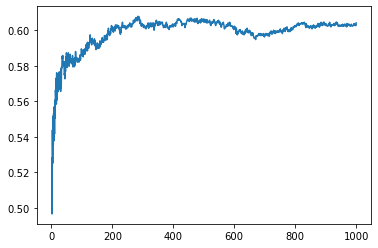

In [20]:
plt.plot(range(1,1001),scores_knn_q1)

In [ ]:
########################################################################################################################

In [105]:
question_1_data = alldata.dropna(subset = ['age','sex_binary', 'drinks_num_scale','drugs_num_scale','smokes_num_scale',\
                                           'essay0_length', 'essay1_length', \
                                           'essay5_length', 'essay6_length', \
                                           'essay0_avg_word_length', 'essay1_avg_word_length', \
                                           'essay5_avg_word_length', 'essay6_avg_word_length', \
                                           'education'])

question_1_data = question_1_data[question_1_data.essay0_length > 1.0]
question_1_data = question_1_data[question_1_data.essay1_length > 1.0]
question_1_data = question_1_data[question_1_data.essay5_length > 1.0]
question_1_data = question_1_data[question_1_data.essay6_length > 1.0]
question_1_data = question_1_data[question_1_data.essay0_avg_word_length != 0.0]
question_1_data = question_1_data[question_1_data.essay1_avg_word_length != 0.0]
question_1_data = question_1_data[question_1_data.essay5_avg_word_length != 0.0]
question_1_data = question_1_data[question_1_data.essay6_avg_word_length != 0.0]

predict_ed_data = question_1_data[['age', 'sex_binary', 'drinks_num_scale','drugs_num_scale','smokes_num_scale',\
                                   'essay0_length', 'essay1_length', \
                                   'essay5_length', 'essay6_length', \
                                   'essay0_avg_word_length', 'essay1_avg_word_length', \
                                   'essay5_avg_word_length','essay6_avg_word_length']]
predict_ed_labels = question_1_data['education']

In [106]:
feat_train_q1, feat_test_q1, labels_train_q1, labels_test_q1 =  \
      train_test_split(predict_ed_data, predict_ed_labels, train_size = 0.70, test_size = 0.3, random_state = 21)

In [107]:
stdscale1 = StandardScaler()
scaled_feat_train_q1 = stdscale1.fit_transform(feat_train_q1)
scaled_feat_test_q1 = stdscale1.transform(feat_test_q1)

In [110]:
scores_knn_q1 = []

for k in range(1,501):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(scaled_feat_train_q1, labels_train_q1)
    scores_knn_q1.append(classifier.score(scaled_feat_test_q1, labels_test_q1))
    
print(scores_knn_q1.index(max(scores_knn_q1))+1)

46


ValueError: x and y must have same first dimension, but have shapes (500,) and (400,)

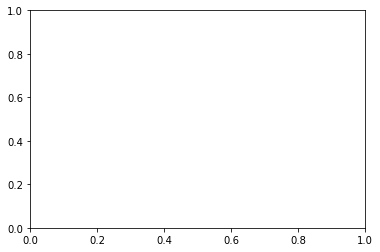

In [116]:
plt.plot(range(1,501),scores_knn_q1)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = scores_knn_q1.index(max(scores_knn_q1))+1)
knn_classifier.fit(scaled_feat_train_q1, labels_train_q1)

knn_labels_predictions = knn_classifier.predict(scaled_feat_test_q1)
knn_classifier_score = knn_classifier.score(scaled_feat_test_q1, labels_test_q1)
print(knn_classifier_score)

In [ ]:
scores = []
gees = []
cees = []

for g in range(1,5):
    for c in range(1,10):
        c = c / 10.0
        classes = SVC(kernel = 'rbf', gamma = g, C = c)
        classes.fit(scaled_feat_train_q1, labels_train_q1)
        scores.append(classes.score(scaled_feat_test_q1,labels_test_q1))
        gees.append(g)
        cees.append(c)

In [ ]:
print(scores.index(max(scores)), max(scores))
print(gees[8])
print(cees[8])

In [ ]:
svm_classifier = SVC(kernel = 'rbf', gamma = 1, C = 0.9)
svm_classifier.fit(scaled_feat_train_q1, labels_train_q1)
print(svm_classifier.score(scaled_feat_test_q1,labels_test_q1))